# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [32]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

In [33]:
from keras.models import Sequential

In [34]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [35]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [36]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [37]:
path_to_dataset = "euroscipy_2016_dl-keras/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [38]:
X_test_orig = X_test

## Data Preparation

In [39]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [40]:
# Seed for reproducibilty
np.random.seed(1338)

# Test data
X_test = X_test.copy()
Y = y_test.copy()

# Converting the output to binary classification(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Selecting the 5918 examples where the output is 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Selecting the examples where the output is not 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Selecting 6000 random examples from the data that 
# only contains the data where the output is not 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [41]:
# Appending the data with output as 6 and data with output as <> 6
X_train = np.append(X_six,X_not_six)

# Reshaping the appended data to appropraite form
X_train = X_train.reshape(X_six.shape[0] + X_not_six.shape[0], 
                          1, img_rows, img_cols)

# Appending the labels and converting the labels to 
# binary classification(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

In [42]:
print(X_train.shape, Y_labels.shape, X_test.shape, Y_test.shape)

(11918, 1, 28, 28) (11918,) (10000, 1, 28, 28) (10000,)


In [43]:
# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# A simple CNN

In [44]:
#Initializing the values for the convolution neural network
nb_epoch = 2
batch_size = 128
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Step 1: Model Definition

In [45]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Step 2: Compile

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 3: Fit

In [47]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 3s - loss: 0.2890 - acc: 0.9326 - val_loss: 0.1251 - val_acc: 0.9722
Epoch 2/2
11918/11918 [==============================] - 3s - loss: 0.1341 - acc: 0.9612 - val_loss: 0.1298 - val_acc: 0.9599


### Step 4: Evaluate

In [48]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.129807698676
Test accuracy: 0.9599


### Let's plot our model Predictions!

In [49]:
import matplotlib.pyplot as plt

%matplotlib inline

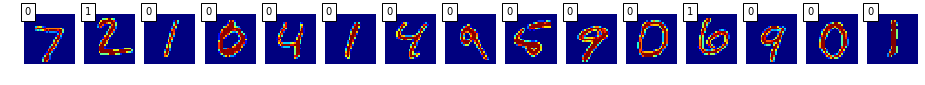

In [50]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [51]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 4s - loss: 0.3044 - acc: 0.9379 - val_loss: 0.1469 - val_acc: 0.9625
Epoch 2/2
11918/11918 [==============================] - 5s - loss: 0.1189 - acc: 0.9640 - val_loss: 0.1058 - val_acc: 0.9655


In [53]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.105762868756
Test accuracy: 0.9655


# Adding Dropout

In [54]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 5s - loss: 0.3128 - acc: 0.9097 - val_loss: 0.1438 - val_acc: 0.9624
Epoch 2/2
11918/11918 [==============================] - 5s - loss: 0.1362 - acc: 0.9580 - val_loss: 0.1145 - val_acc: 0.9628


In [56]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.114496422485
Test accuracy: 0.9628


# Adding more Convolution Layers

In [57]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 21s - loss: 0.4697 - acc: 0.8281 - val_loss: 0.2289 - val_acc: 0.9409
Epoch 2/2
11918/11918 [==============================] - 21s - loss: 0.1877 - acc: 0.9386 - val_loss: 0.1192 - val_acc: 0.9619


In [59]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.119203875798
Test accuracy: 0.9619


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [60]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              nb_epoch=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [61]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 21s - loss: 0.5620 - acc: 0.7844 - val_loss: 0.3555 - val_acc: 0.9357
Epoch 2/2
11918/11918 [==============================] - 21s - loss: 0.2371 - acc: 0.9298 - val_loss: 0.2250 - val_acc: 0.9184
Test score: 0.225025356388
Test accuracy: 0.9184
1 loop, best of 1: 50 s per loop


# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(epsilon=1e-06, mode=0, 
                   axis=-1, momentum=0.99, 
                   weights=None, beta_init='zero', 
                   gamma_init='one')
```

In [62]:
# Try to add a new BatchNormalization layer to the Model 
# (after the Dropout layer)